In [1]:
import os
import sys
import graphviz

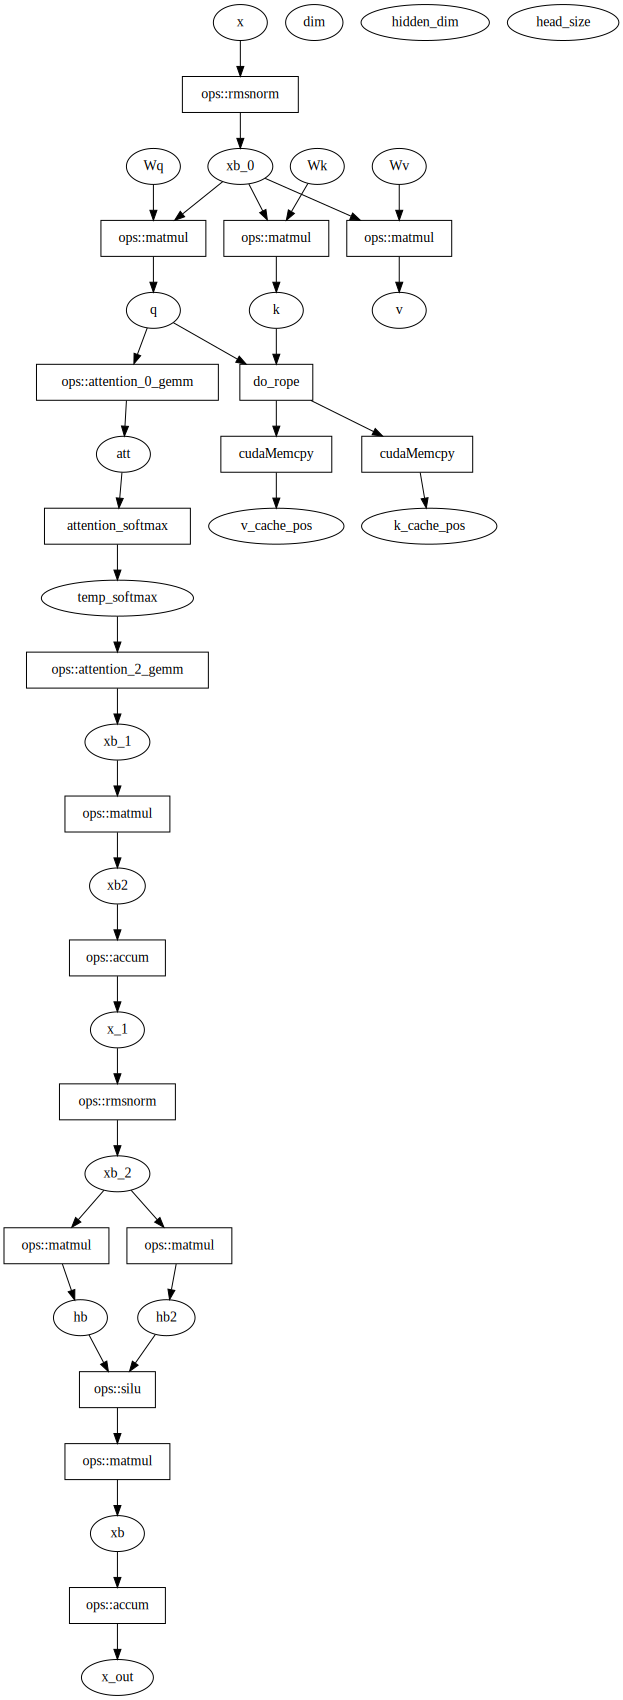

In [40]:
dot_data = '''
// Generated Graphviz Dot Representation
digraph transformer_layer {
    // Define nodes
    x [label="x"];
    dim [label="dim"];
    hidden_dim [label="hidden_dim"];
    head_size [label="head_size"];
    xb [label="xb"];
    q [label="q"];
    k [label="k"];
    v [label="v"];
    k_cache_pos [label="k_cache_pos"];
    v_cache_pos [label="v_cache_pos"];
    att [label="att"];
    temp_softmax [label="temp_softmax"];
    xb2 [label="xb2"];
    hb [label="hb"];
    hb2 [label="hb2"];

    // Define operations
    rmsnorm1 [label="ops::rmsnorm", shape=box];
    matmul_q [label="ops::matmul", shape=box];
    matmul_k [label="ops::matmul", shape=box];
    matmul_v [label="ops::matmul", shape=box];
    do_rope [label="do_rope", shape=box];
    cudaMemcpyK [label="cudaMemcpy", shape=box];
    cudaMemcpyV [label="cudaMemcpy", shape=box];
    attention_0_gemm [label="ops::attention_0_gemm", shape=box];
    softmax [label="attention_softmax", shape=box];
    attention_2_gemm [label="ops::attention_2_gemm", shape=box];
    matmul_xb2 [label="ops::matmul", shape=box];
    accum1 [label="ops::accum", shape=box];
    rmsnorm2 [label="ops::rmsnorm", shape=box];
    matmul_hb [label="ops::matmul", shape=box];
    matmul_hb2 [label="ops::matmul", shape=box];
    silu [label="ops::silu", shape=box];
    matmul_xb [label="ops::matmul", shape=box];
    accum2 [label="ops::accum", shape=box];

    // Configuration variables
    // dim -> matmul_q;
    // dim -> matmul_k;
    // dim -> matmul_v;
    // dim -> matmul_xb2;
    // hidden_dim -> matmul_hb;
    // hidden_dim -> matmul_hb2;
    // hidden_dim -> matmul_xb;
    // head_size -> do_rope;
    // head_size -> attention_0_gemm;
    // head_size -> attention_2_gemm;

    // Define edges
    x -> rmsnorm1;
    rmsnorm1 -> xb_0;
    xb_0 -> matmul_q -> q;
    xb_0 -> matmul_k -> k;
    xb_0 -> matmul_v -> v;
    Wq -> matmul_q;
    Wk -> matmul_k;
    Wv -> matmul_v;
    q -> do_rope;
    k -> do_rope;
    do_rope -> cudaMemcpyK -> k_cache_pos;
    do_rope -> cudaMemcpyV -> v_cache_pos;
    q -> attention_0_gemm -> att;
    att -> softmax -> temp_softmax;
    temp_softmax -> attention_2_gemm -> xb_1;
    xb_1 -> matmul_xb2 -> xb2;
    xb2 -> accum1;
    accum1 -> x_1;
    x_1 -> rmsnorm2 -> xb_2;
    xb_2 -> matmul_hb -> hb;
    xb_2 -> matmul_hb2 -> hb2;
    hb -> silu;
    hb2 -> silu;
    silu -> matmul_xb -> xb;
    xb -> accum2;
    accum2 -> x_out;
}
'''

graphviz.Source(dot_data)